CSV file successfully loaded.

Distribution of BMI Categories:
BMI_Category
Overweight     93749
Obesity        87851
Normal         68953
Underweight     3127
Name: count, dtype: int64


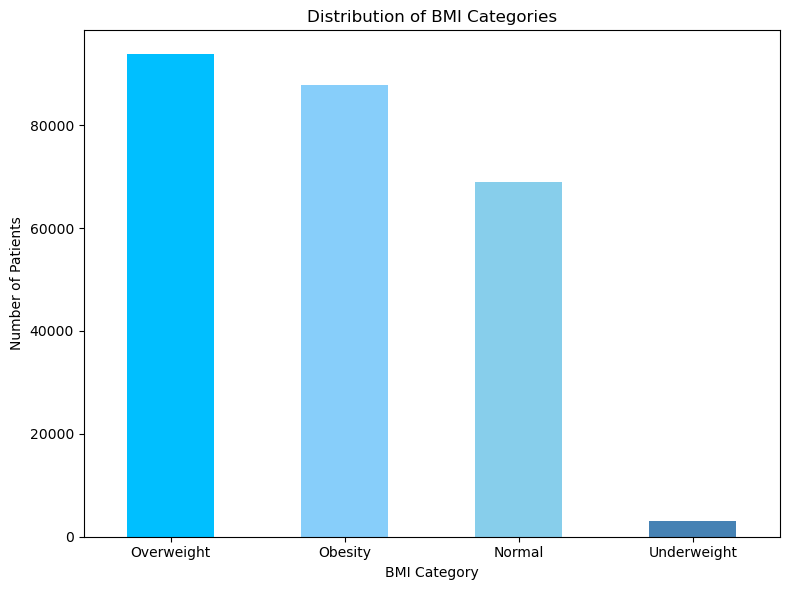


Distribution of BMI Categories Among Diabetes Patients:
BMI_Category
Underweight      197
Normal          4617
Overweight     12218
Obesity        22945
Name: count, dtype: int64


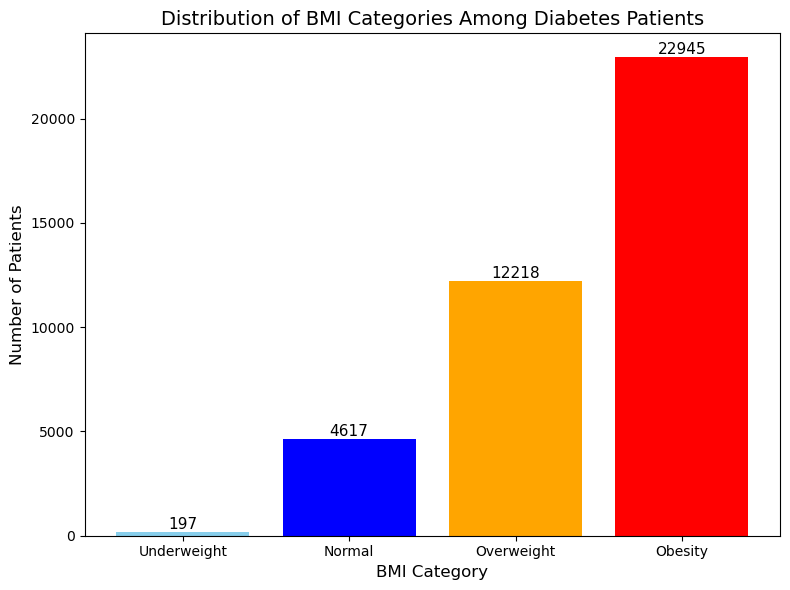

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the input file path
input_file = 'diabetes_012_health_indicators_BRFSS2015_modified2.csv'

# Read the CSV file into a pandas DataFrame with proper error handling
try:
    df = pd.read_csv(input_file)
    print("CSV file successfully loaded.")
except FileNotFoundError:
    print(f"Error: The file '{input_file}' does not exist.")
    exit()
except pd.errors.EmptyDataError:
    print("Error: The file is empty.")
    exit()
except pd.errors.ParserError:
    print("Error: The file could not be parsed.")
    exit()

# Check if 'BMI' column exists
if 'BMI' not in df.columns:
    print("Error: 'BMI' column not found in the dataset.")
    exit()

# Ensure 'BMI' is numeric, coercing errors to NaN
df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce')

# Handle missing or invalid BMI values
missing_bmi = df['BMI'].isnull().sum()
if missing_bmi > 0:
    print(f"Warning: {missing_bmi} records have missing or invalid BMI values. These will be excluded from categorization.")

# Define BMI categories and bins
bins = [0, 18.5, 25, 30, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obesity']

# Create a new column 'BMI_Category' based on BMI values
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

# Display the distribution of BMI categories
bmi_category_counts = df['BMI_Category'].value_counts(dropna=False)
print("\nDistribution of BMI Categories:")
print(bmi_category_counts)

# Optionally, visualize the distribution using a bar chart
try:
    plt.figure(figsize=(8,6))
    bmi_category_counts.dropna().plot(kind='bar', color=['deepskyblue', 'lightskyblue', 'skyblue', 'steelblue'])
    plt.title('Distribution of BMI Categories')
    plt.xlabel('BMI Category')
    plt.ylabel('Number of Patients')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
except ImportError:
    print("matplotlib is not installed. Skipping the visualization step.")

# The DataFrame 'df' now contains the new 'BMI_Category' column for further analysis


# Check if required columns exist
required_columns = ['Diabetes_012', 'BMI_Category']
missing_columns = [col for col in required_columns if col not in df.columns]

# Filter the DataFrame for diabetes patients (Diabetes_binary == 1)
diabetes_patients = df[df['Diabetes_012'] == 1]

# Handle missing or invalid BMI_Category values
valid_bmi_categories = ['Underweight', 'Normal', 'Overweight', 'Obesity']
diabetes_patients = diabetes_patients[diabetes_patients['BMI_Category'].isin(valid_bmi_categories)]

# Calculate the distribution of BMI categories among diabetes patients
bmi_distribution = diabetes_patients['BMI_Category'].value_counts().reindex(valid_bmi_categories)

# Display the distribution
print("\nDistribution of BMI Categories Among Diabetes Patients:")
print(bmi_distribution)

# Plot the distribution using a bar chart
plt.figure(figsize=(8,6))
bars = plt.bar(bmi_distribution.index, bmi_distribution.values, color=['skyblue', 'blue', 'orange', 'red'])

# Add title and labels
plt.title('Distribution of BMI Categories Among Diabetes Patients', fontsize=14)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)

# Add counts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5, f'{int(height)}', ha='center', va='bottom', fontsize=11)

# Improve layout and display the plot
plt.tight_layout()
plt.show()
# Filter the DataFr


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the input file path
input_file = 'diabetes_012_health_indicators_BRFSS2015_modified2.csv'

# Read the CSV file into a pandas DataFrame with proper error handling
try:
    df = pd.read_csv(input_file)
    print("CSV file successfully loaded.")
except FileNotFoundError:
    print(f"Error: The file '{input_file}' does not exist.")
    exit()
except pd.errors.EmptyDataError:
    print("Error: The file is empty.")
    exit()
except pd.errors.ParserError:
    print("Error: The file could not be parsed.")
    exit()

# Check if required columns exist
required_columns = ['Diabetes_012', 'BMI']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Error: Missing columns in the dataset: {', '.join(missing_columns)}")
    exit()

# Ensure 'BMI' is numeric, coercing errors to NaN
df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce')

# Handle missing or invalid BMI values
missing_bmi = df['BMI'].isnull().sum()  # Corrected typo from 'su' to 'sum()'
if missing_bmi > 0:
    print(f"Warning: {missing_bmi} records have missing or invalid BMI values. These will be excluded from categorization.")

# Replace all occurrences of 2 with 1 in the 'Diabetes_012' column to create a binary classification
df['Diabetes_binary'] = df['Diabetes_012'].replace(2, 1)

# Create a new column 'Diabetes_Status' for better readability
df['Diabetes_Status'] = df['Diabetes_binary'].map({0: 'Non-Diabetes', 1: 'Diabetes'})

# Verify the mapping and handle any unmapped values
if df['Diabetes_Status'].isnull().any():
    print("Warning: Some records in 'Diabetes_binary' could not be mapped to 'Diabetes_Status'. These will be excluded from the plot.")
    df = df.dropna(subset=['Diabetes_Status'])

# Drop records with missing BMI values for further analysis
df_clean = df.dropna(subset=['BMI'])

# Calculate descriptive statistics for BMI
bmi_descriptive = df_clean['BMI'].describe()
print("\nDescriptive Statistics for BMI:")
print(bmi_descriptive)


CSV file successfully loaded.

Descriptive Statistics for BMI:
count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64


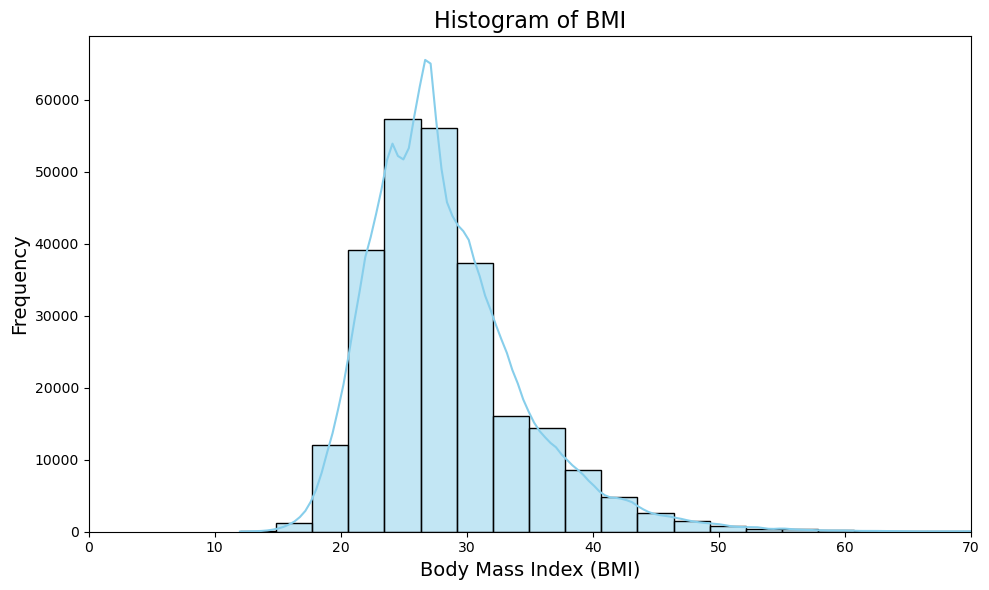

In [3]:
# Plot histogram of BMI
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['BMI'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of BMI', fontsize=16)
plt.xlabel('Body Mass Index (BMI)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0, 70)  # Set x-axis limits from 0 to 70
plt.tight_layout()
plt.show()


CSV file successfully loaded.

Comparison of BMI Category Percentage Distributions:
              Diabetes Patients (%)  Non-Diabetes Patients (%)
BMI_Category                                                  
Underweight                0.492783                   1.371062
Normal                    11.549141                  30.105333
Overweight                30.562573                  38.151547
Obesity                   57.395502                  30.372058


/var/folders/zv/pzhnzn4546b4lr4jzg2jq9t80000gn/T/ipykernel_62040/3299438692.py:102: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x[i], comparison_df['Diabetes Patients (%)'][i] + 1,
/var/folders/zv/pzhnzn4546b4lr4jzg2jq9t80000gn/T/ipykernel_62040/3299438692.py:103: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{comparison_df['Diabetes Patients (%)'][i]:.1f}%", ha='center', fontsize=10)
/var/folders/zv/pzhnzn4546b4lr4jzg2jq9t80000gn/T/ipykernel_62040/3299438692.py:105: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as lab

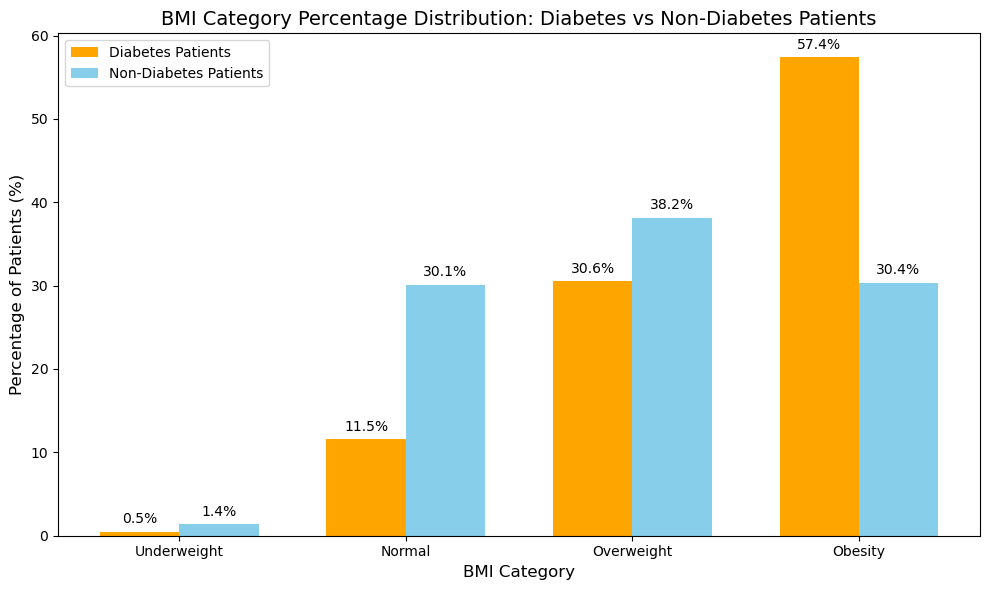

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the input file path
input_file = 'diabetes_012_health_indicators_BRFSS2015_modified2.csv'

# Read the CSV file into a pandas DataFrame with proper error handling
try:
    df = pd.read_csv(input_file)
    print("CSV file successfully loaded.")
except FileNotFoundError:
    print(f"Error: The file '{input_file}' does not exist.")
    exit()
except pd.errors.EmptyDataError:
    print("Error: The file is empty.")
    exit()
except pd.errors.ParserError:
    print("Error: The file could not be parsed.")
    exit()

# Check if 'BMI' column exists
if 'BMI' not in df.columns:
    print("Error: 'BMI' column not found in the dataset.")
    exit()

# Ensure 'BMI' is numeric, coercing errors to NaN
df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce')

# Handle missing or invalid BMI values
missing_bmi = df['BMI'].isnull().sum()
if missing_bmi > 0:
    print(f"Warning: {missing_bmi} records have missing or invalid BMI values. These will be excluded from categorization.")

# Define BMI categories and bins
bins = [0, 18.5, 25, 30, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obesity']

# Create a new column 'BMI_Category' based on BMI values
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

# Check if required columns exist
required_columns = ['Diabetes_012', 'BMI_Category']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Error: Missing columns in the dataset: {missing_columns}")
    exit()

# Filter the DataFrame for diabetes patients (Diabetes_012 == 1)
diabetes_patients = df[df['Diabetes_012'] == 1]

# Filter the DataFrame for non-diabetes patients (Diabetes_012 == 0)
non_diabetes_patients = df[df['Diabetes_012'] == 0]

# Handle missing or invalid BMI_Category values for both groups
valid_bmi_categories = ['Underweight', 'Normal', 'Overweight', 'Obesity']
diabetes_patients = diabetes_patients[diabetes_patients['BMI_Category'].isin(valid_bmi_categories)]
non_diabetes_patients = non_diabetes_patients[non_diabetes_patients['BMI_Category'].isin(valid_bmi_categories)]

# Calculate the BMI category distribution as percentages
diabetes_bmi_percentage = (
    diabetes_patients['BMI_Category']
    .value_counts(normalize=True)
    .reindex(valid_bmi_categories, fill_value=0) * 100
)
non_diabetes_bmi_percentage = (
    non_diabetes_patients['BMI_Category']
    .value_counts(normalize=True)
    .reindex(valid_bmi_categories, fill_value=0) * 100
)

# Combine the percentage distributions into a DataFrame for side-by-side comparison
comparison_df = pd.DataFrame({
    'Diabetes Patients (%)': diabetes_bmi_percentage,
    'Non-Diabetes Patients (%)': non_diabetes_bmi_percentage
})

print("\nComparison of BMI Category Percentage Distributions:")
print(comparison_df)

# Plot side-by-side bar charts for percentage comparison
plt.figure(figsize=(10, 6))
x = range(len(valid_bmi_categories))
width = 0.35  # Width of the bars

# Plot bars for diabetes patients
plt.bar(x, comparison_df['Diabetes Patients (%)'], width=width, label='Diabetes Patients', color='orange')

# Plot bars for non-diabetes patients
plt.bar([p + width for p in x], comparison_df['Non-Diabetes Patients (%)'], width=width, label='Non-Diabetes Patients', color='skyblue')

# Add labels and title
plt.title('BMI Category Percentage Distribution: Diabetes vs Non-Diabetes Patients', fontsize=14)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Percentage of Patients (%)', fontsize=12)
plt.xticks([p + width/2 for p in x], valid_bmi_categories)
plt.legend()

# Add percentage values on top of the bars
for i, category in enumerate(valid_bmi_categories):
    # Add percentages for diabetes patients
    plt.text(x[i], comparison_df['Diabetes Patients (%)'][i] + 1,
             f"{comparison_df['Diabetes Patients (%)'][i]:.1f}%", ha='center', fontsize=10)
    # Add percentages for non-diabetes patients
    plt.text(x[i] + width, comparison_df['Non-Diabetes Patients (%)'][i] + 1,
             f"{comparison_df['Non-Diabetes Patients (%)'][i]:.1f}%", ha='center', fontsize=10)

# Improve layout and display the plot
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
from scipy.stats import pearsonr

# Load your dataset
file_path = 'diabetes_012_health_indicators_BRFSS2015_modified2.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Ensure relevant columns exist and contain numeric data
df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce')  # Handle non-numeric values in BMI
df['Diabetes_012'] = pd.to_numeric(df['Diabetes_012'], errors='coerce')  # Ensure diabetes column is numeric

# Drop rows with missing values in these columns
df_clean = df.dropna(subset=['BMI', 'Diabetes_012'])

# Calculate Pearson's correlation coefficient
correlation, p_value = pearsonr(df_clean['BMI'], df_clean['Diabetes_012'])

# Print the results
print(f"Pearson's correlation coefficient between BMI and Diabetes prevalence: {correlation:.3f}")
print(f"P-value: {p_value:.3e}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Pearson's correlation coefficient between BMI and Diabetes prevalence: 0.224
P-value: 0.000e+00
The correlation is statistically significant.


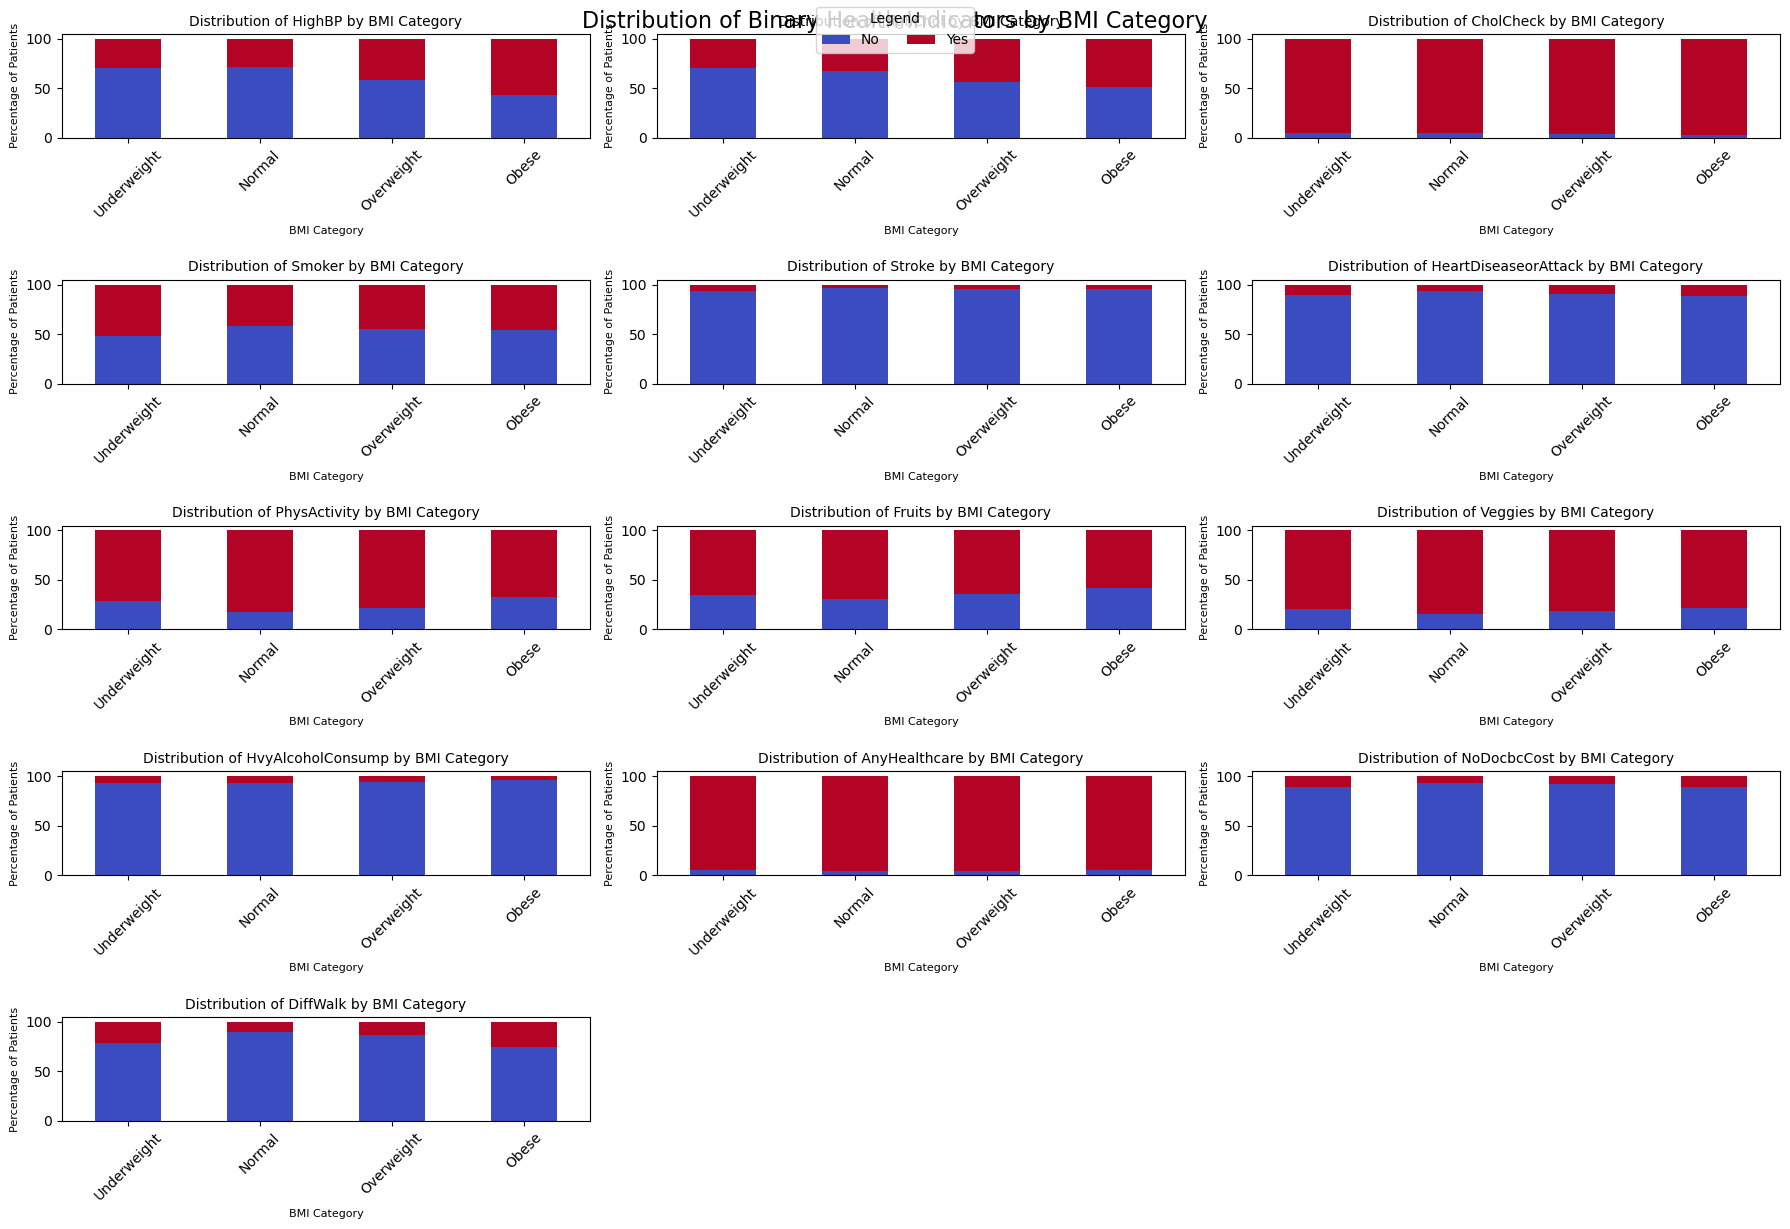

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = 'diabetes_012_health_indicators_BRFSS2015_modified2.csv'
df = pd.read_csv(file_path)

# Categorize BMI into groups
bins = [0, 18.5, 25, 30, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

# List of binary variables to analyze
binary_vars = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
               'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
               'NoDocbcCost', 'DiffWalk']

# Set up a grid for subplots (3 columns per row)
num_vars = len(binary_vars)
num_cols = 3  # Number of plots per row
num_rows = (num_vars + num_cols - 1) // num_cols  # Calculate rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))  # Adjust figure size as needed
axes = axes.flatten()  # Flatten axes array to easily loop through it

# Loop through each variable and plot the stacked bar chart
for i, var in enumerate(binary_vars):
    crosstab = pd.crosstab(df['BMI_Category'], df[var], normalize='index') * 100  # Normalize to show percentage
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], colormap='coolwarm', legend=False)

    # Titles and labels
    axes[i].set_title(f"Distribution of {var} by BMI Category", fontsize=10)
    axes[i].set_xlabel("BMI Category", fontsize=8)
    axes[i].set_ylabel("Percentage of Patients", fontsize=8)
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots if the number of variables doesn't fit exactly
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a single legend for clarity
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ['No', 'Yes'], loc='upper center', ncol=6, title="Legend", fontsize=10)

# Add a main title for the entire figure
fig.suptitle("Distribution of Binary Health Indicators by BMI Category", fontsize=16, y=1.02)

# Adjust layout for spacing
plt.tight_layout()
plt.subplots_adjust(top=1)  # Adjust space for suptitle
plt.show()


/var/folders/zv/pzhnzn4546b4lr4jzg2jq9t80000gn/T/ipykernel_62040/2560526218.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BMI_Category', y=var, data=df, palette='coolwarm', ax=axes[i])
/var/folders/zv/pzhnzn4546b4lr4jzg2jq9t80000gn/T/ipykernel_62040/2560526218.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BMI_Category', y=var, data=df, palette='coolwarm', ax=axes[i])
/var/folders/zv/pzhnzn4546b4lr4jzg2jq9t80000gn/T/ipykernel_62040/2560526218.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BMI_Category', y=var, dat

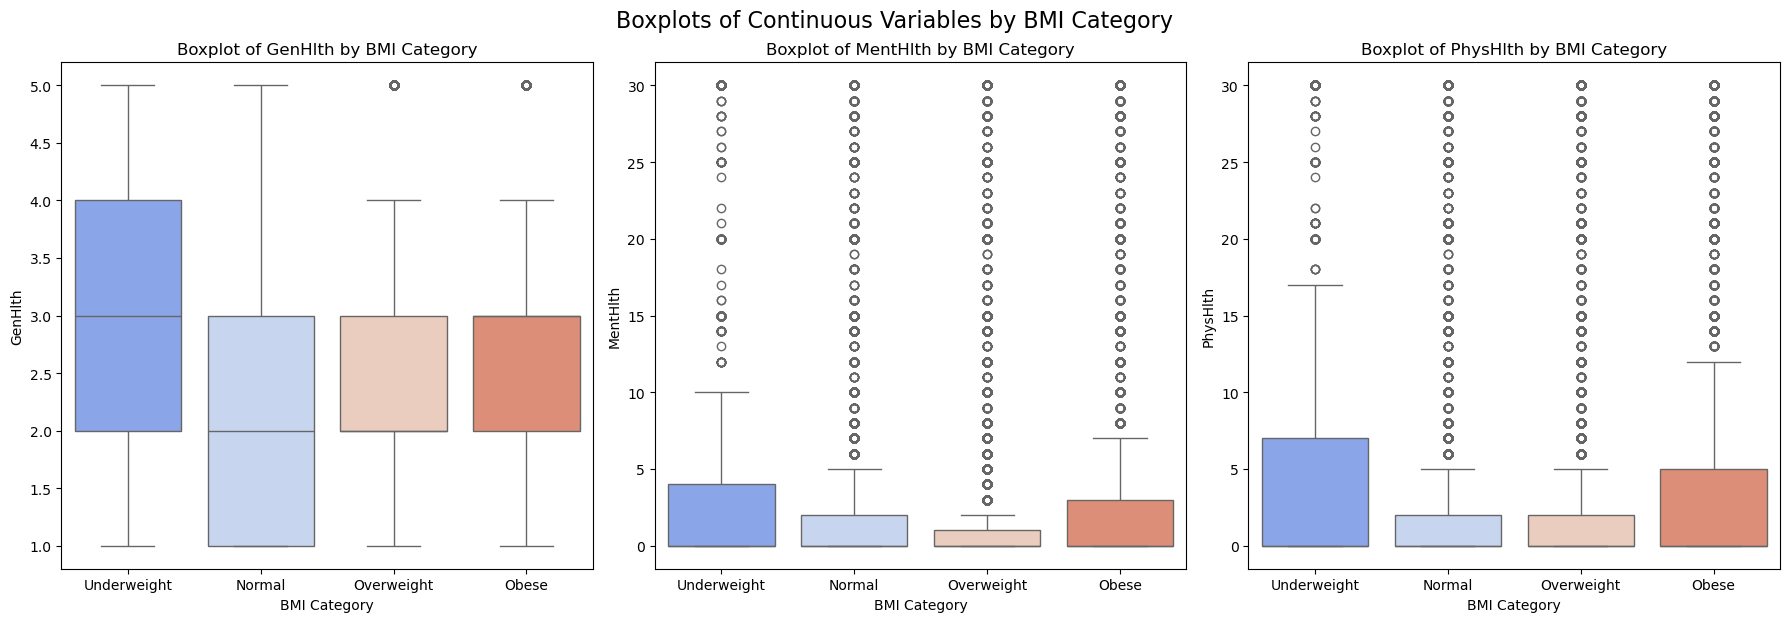

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = 'diabetes_012_health_indicators_BRFSS2015_modified2.csv'
df = pd.read_csv(file_path)

# Categorize BMI into groups
bins = [0, 18.5, 25, 30, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

# Continuous and ordinal variables
continuous_vars = ['GenHlth', 'MentHlth', 'PhysHlth']

# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Loop through variables and plot boxplots
for i, var in enumerate(continuous_vars):
    sns.boxplot(x='BMI_Category', y=var, data=df, palette='coolwarm', ax=axes[i])
    axes[i].set_title(f"Boxplot of {var} by BMI Category", fontsize=12)
    axes[i].set_xlabel("BMI Category", fontsize=10)
    axes[i].set_ylabel(var, fontsize=10)

# Adjust layout for spacing
plt.tight_layout()
plt.suptitle("Boxplots of Continuous Variables by BMI Category", fontsize=16, y=1.03)
plt.show()


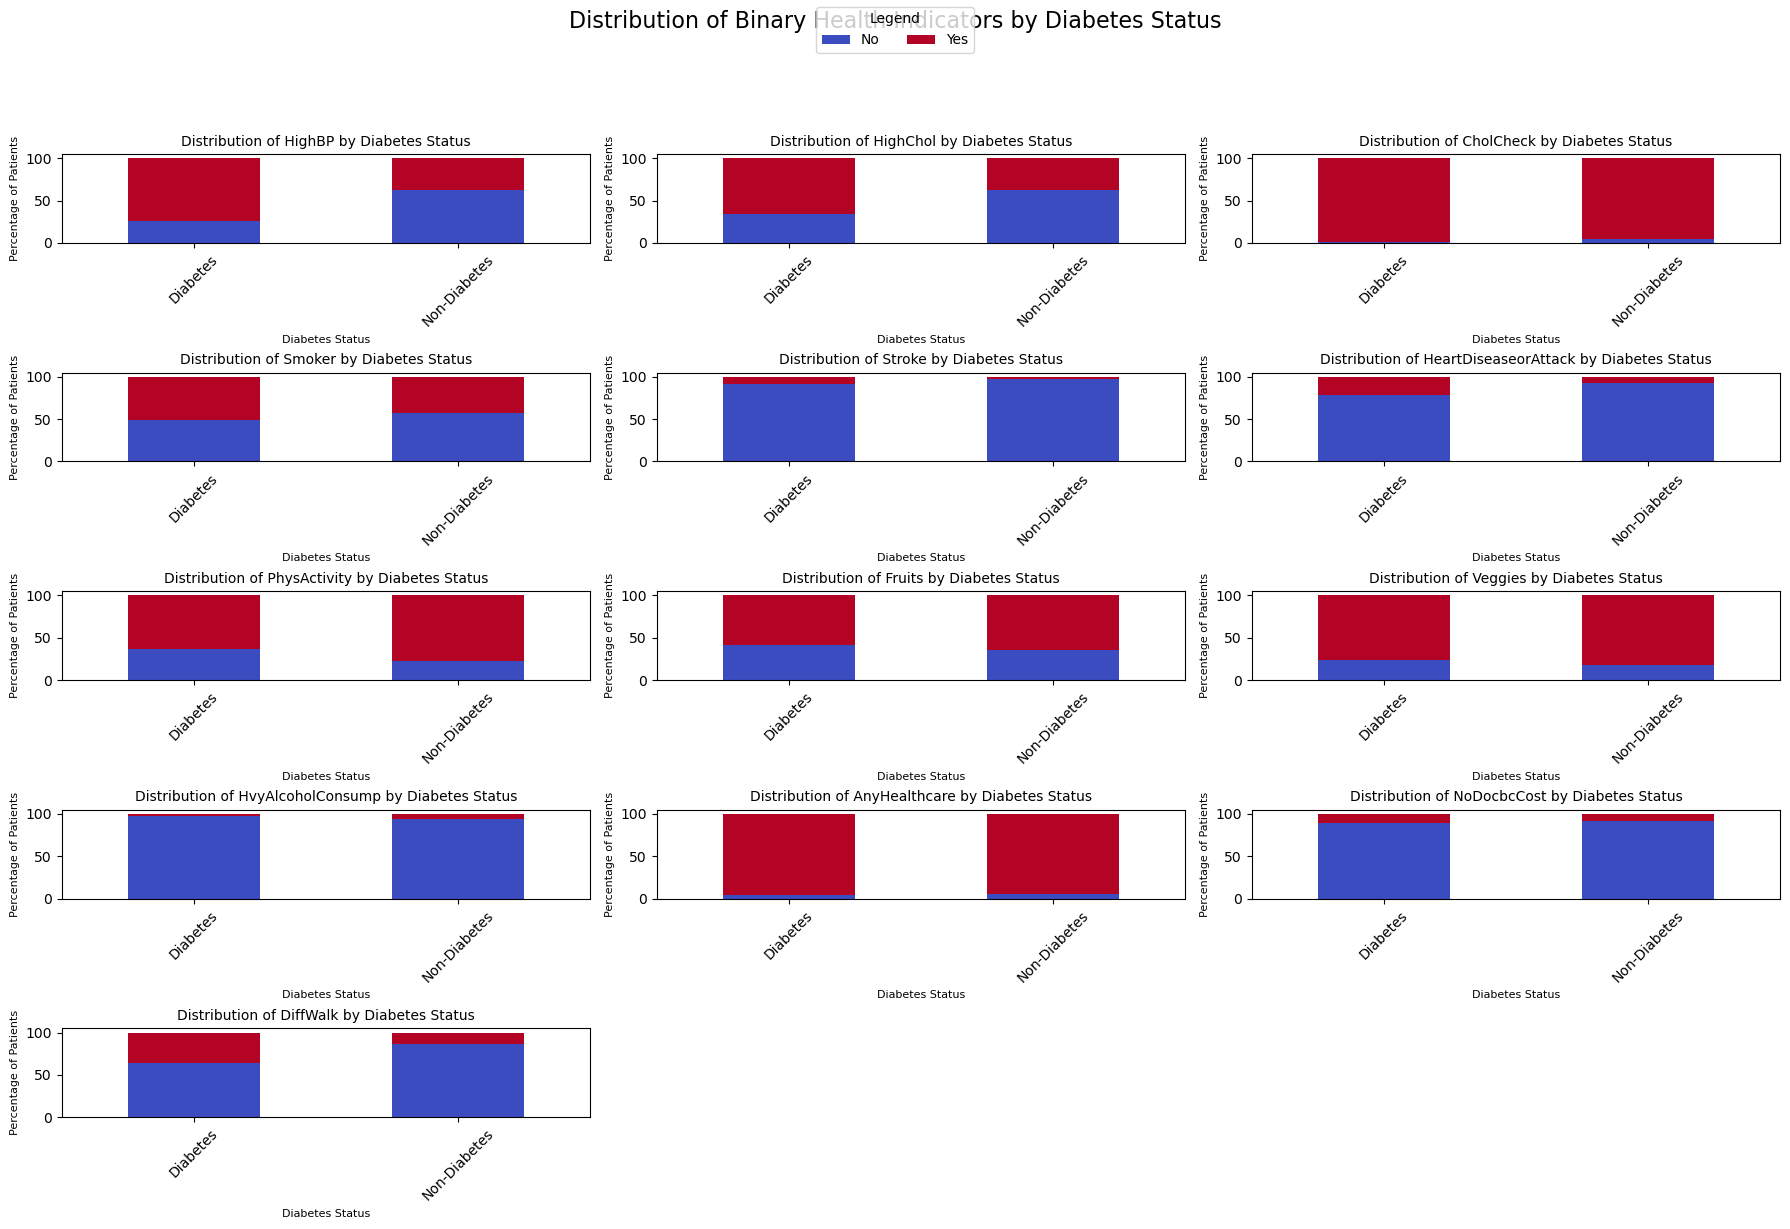

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = 'diabetes_012_health_indicators_BRFSS2015_modified2.csv'
df = pd.read_csv(file_path)

# List of binary health indicators to analyze
binary_vars = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
               'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
               'NoDocbcCost', 'DiffWalk']

# Ensure 'Diabetes_012' column exists
if 'Diabetes_012' not in df.columns:
    raise ValueError("Error: 'Diabetes_012' column is missing in the dataset.")

# Map Diabetes_012 into readable categories
df['Diabetes_Status'] = df['Diabetes_012'].map({0: 'Non-Diabetes', 1: 'Diabetes'})

# Set up a grid for subplots (3 columns per row)
num_vars = len(binary_vars)
num_cols = 3  # Number of plots per row
num_rows = (num_vars + num_cols - 1) // num_cols  # Calculate rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))  # Adjust figure size as needed
axes = axes.flatten()  # Flatten axes array to easily loop through it

# Loop through each variable and plot the stacked bar chart
for i, var in enumerate(binary_vars):
    # Crosstab to calculate the percentage of 'Yes' and 'No' for each binary variable by Diabetes_Status
    crosstab = pd.crosstab(df['Diabetes_Status'], df[var], normalize='index') * 100
    
    # Plot the stacked bar chart
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], colormap='coolwarm', legend=False)
    
    # Titles and labels
    axes[i].set_title(f"Distribution of {var} by Diabetes Status", fontsize=10)
    axes[i].set_xlabel("Diabetes Status", fontsize=8)
    axes[i].set_ylabel("Percentage of Patients", fontsize=8)
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots if the number of variables doesn't fit exactly
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a single legend for clarity
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ['No', 'Yes'], loc='upper center', ncol=6, title="Legend", fontsize=10)

# Add a main title for the entire figure
fig.suptitle("Distribution of Binary Health Indicators by Diabetes Status", fontsize=16, y=1.02)

# Adjust layout for spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust space for suptitle
plt.show()


/var/folders/zv/pzhnzn4546b4lr4jzg2jq9t80000gn/T/ipykernel_62040/2304160965.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_Status', y=var, data=df, palette='coolwarm', ax=axes[i])
/var/folders/zv/pzhnzn4546b4lr4jzg2jq9t80000gn/T/ipykernel_62040/2304160965.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_Status', y=var, data=df, palette='coolwarm', ax=axes[i])
/var/folders/zv/pzhnzn4546b4lr4jzg2jq9t80000gn/T/ipykernel_62040/2304160965.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_Status', y

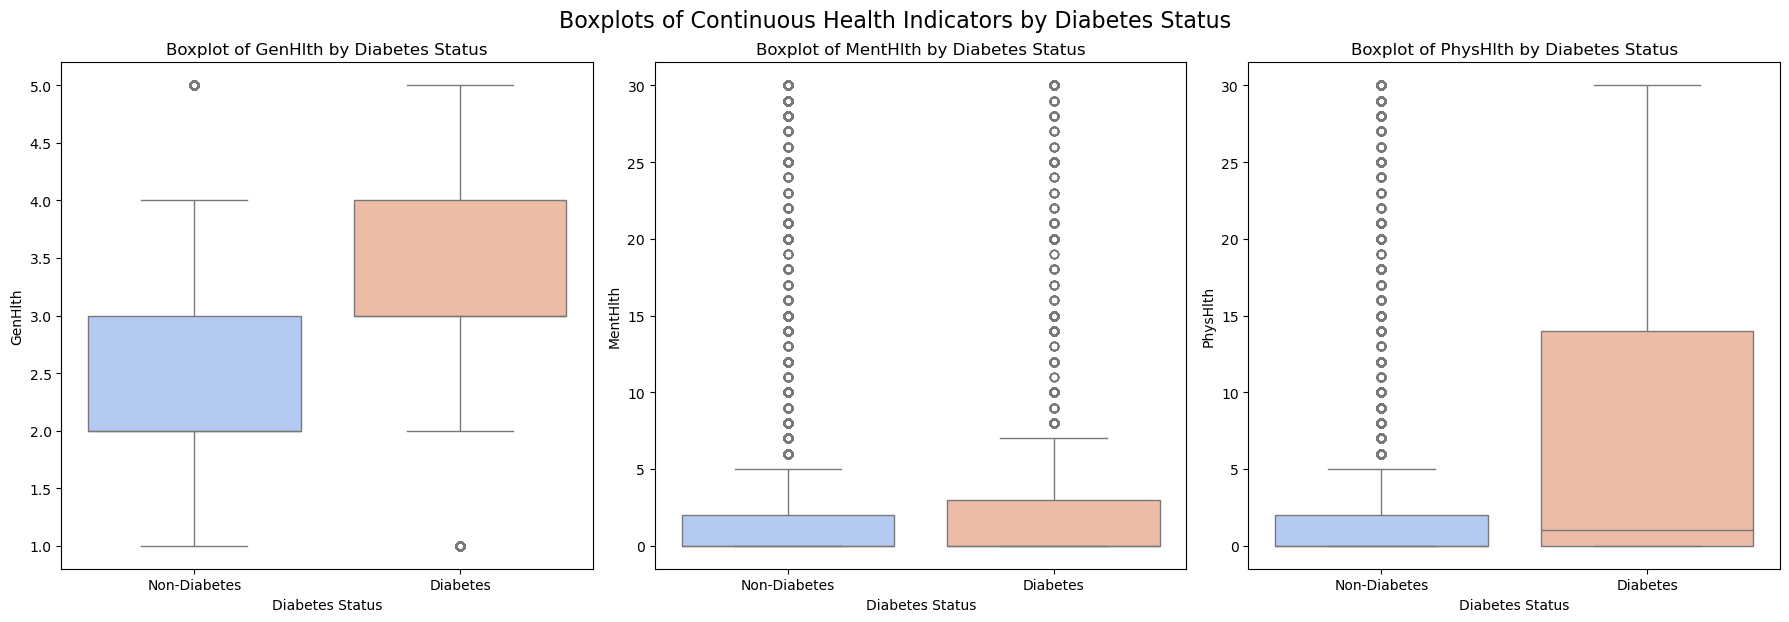

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = 'diabetes_012_health_indicators_BRFSS2015_modified2.csv'
df = pd.read_csv(file_path)

# Map Diabetes_012 into readable categories
df['Diabetes_Status'] = df['Diabetes_012'].map({0: 'Non-Diabetes', 1: 'Diabetes'})

# List of continuous health indicators
continuous_vars = ['GenHlth', 'MentHlth', 'PhysHlth']

# Set up the figure with subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop through variables and create boxplots
for i, var in enumerate(continuous_vars):
    sns.boxplot(x='Diabetes_Status', y=var, data=df, palette='coolwarm', ax=axes[i])
    axes[i].set_title(f"Boxplot of {var} by Diabetes Status", fontsize=12)
    axes[i].set_xlabel("Diabetes Status", fontsize=10)
    axes[i].set_ylabel(var, fontsize=10)

# Adjust layout for clarity
plt.tight_layout()
plt.suptitle("Boxplots of Continuous Health Indicators by Diabetes Status", fontsize=16, y=1.03)
plt.show()


Training Accuracy (Resampled): 72.75%
Testing Accuracy: 71.19%

Confusion Matrix on Test Set:
[[45401 18710]
 [ 3218  8775]]

Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       0.93      0.71      0.81     64111
         1.0       0.32      0.73      0.44     11993

    accuracy                           0.71     76104
   macro avg       0.63      0.72      0.63     76104
weighted avg       0.84      0.71      0.75     76104


Feature Importance for Logistic Regression:
                 Feature  Coefficient  Absolute_Coefficient
2              CholCheck     1.736078              1.736078
9      HvyAlcoholConsump    -1.182022              1.182022
0                 HighBP     1.068580              1.068580
1               HighChol     0.698346              0.698346
12               GenHlth     0.654144              0.654144
15              DiffWalk     0.318722              0.318722
10         AnyHealthcare     0.316047          

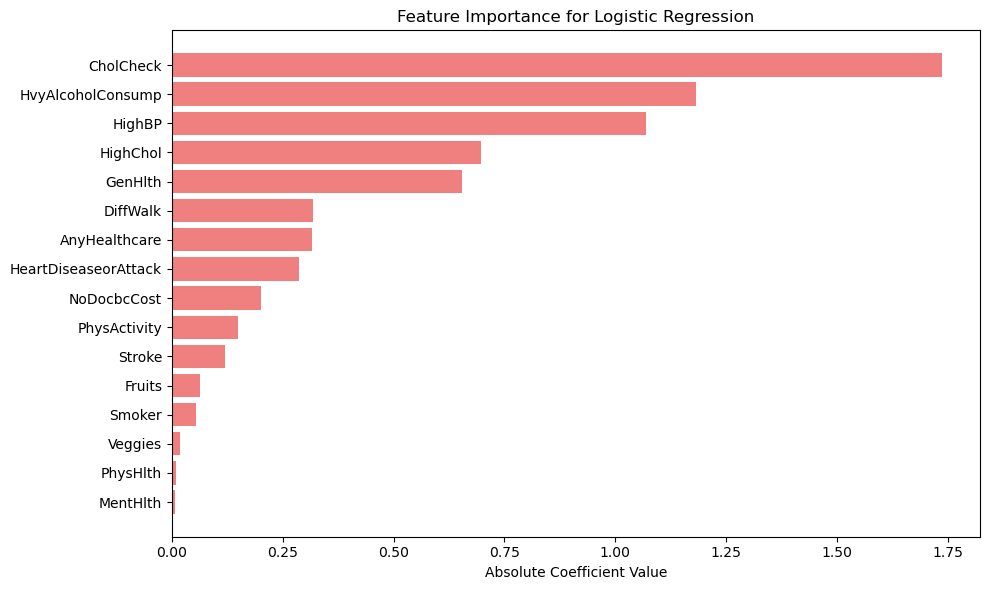

In [13]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight

# Load dataset
file_path = 'diabetes_012_health_indicators_BRFSS2015_modified2.csv'
df = pd.read_csv(file_path)

# Define features and target
features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
            'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
            'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 
            'MentHlth', 'PhysHlth', 'DiffWalk']
target = 'Diabetes_012'

X = df[features]
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 1: Apply SMOTE for Oversampling the Minority Class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 2: Logistic Regression with Class Weight Adjustment
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_train_pred = model.predict(X_train_resampled)
y_test_pred = model.predict(X_test)

# Accuracy Scores
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print Results
print(f"Training Accuracy (Resampled): {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%\n")

# Confusion Matrix and Classification Report
print("Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

# Feature Importance
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

# Print and Visualize Feature Importance
print("\nFeature Importance for Logistic Regression:")
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Absolute_Coefficient'], color='lightcoral')
plt.gca().invert_yaxis()
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance for Logistic Regression')
plt.tight_layout()
plt.show()


In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on test set
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calculate Error Rates
type_I_error_rate = fp / (fp + tn)  # False Positive Rate
type_II_error_rate = fn / (fn + tp)  # False Negative Rate

# Display Error Rates
print("Confusion Matrix:")
print(cm)
print(f"Type I Error Rate (False Positive Rate): {type_I_error_rate:.2f}")
print(f"Type II Error Rate (False Negative Rate): {type_II_error_rate:.2f}")

# Optional: Print Classification Report for Overview
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[45401 18710]
 [ 3218  8775]]
Type I Error Rate (False Positive Rate): 0.29
Type II Error Rate (False Negative Rate): 0.27

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.71      0.81     64111
         1.0       0.32      0.73      0.44     11993

    accuracy                           0.71     76104
   macro avg       0.63      0.72      0.63     76104
weighted avg       0.84      0.71      0.75     76104



Training Accuracy (Resampled): 62.27%
Testing Accuracy: 59.93%

Confusion Matrix on Test Set:
[[14074  7550]
 [22944 31536]]

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.38      0.65      0.48     21624
           1       0.81      0.58      0.67     54480

    accuracy                           0.60     76104
   macro avg       0.59      0.61      0.58     76104
weighted avg       0.69      0.60      0.62     76104


Feature Importance for Logistic Regression:
                 Feature  Coefficient  Absolute_Coefficient
0                 HighBP     0.697990              0.697990
1               HighChol     0.321721              0.321721
15              DiffWalk     0.316010              0.316010
9      HvyAlcoholConsump    -0.280239              0.280239
7                 Fruits    -0.267405              0.267405
6           PhysActivity    -0.245180              0.245180
12               GenHlth     0.215004          

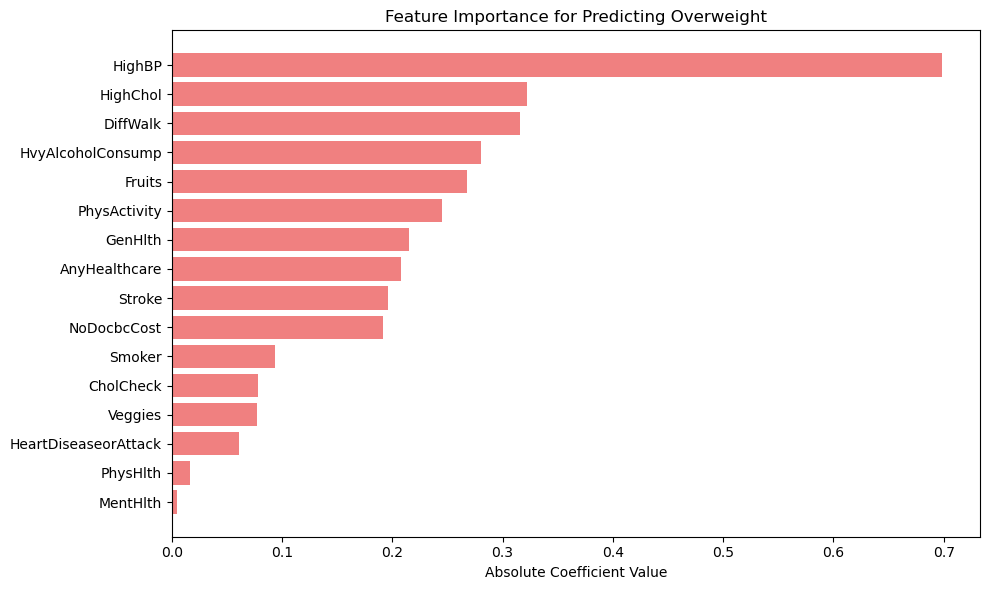

In [17]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = 'diabetes_012_health_indicators_BRFSS2015_modified2.csv'
df = pd.read_csv(file_path)

# Step 1: Create the Target Variable (Overweight or Not)
# Define "Overweight" as BMI >= 25
df['Overweight'] = (df['BMI'] >= 25).astype(int)  # 1 = Overweight, 0 = Not Overweight

# Define features and target
features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
            'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
            'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 
            'MentHlth', 'PhysHlth', 'DiffWalk']

target = 'Overweight'

X = df[features]
y = df[target]

# Step 2: Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Apply SMOTE for Oversampling the Minority Class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 4: Train Logistic Regression Model with Class Weight Adjustment
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Step 5: Model Predictions
y_train_pred = model.predict(X_train_resampled)
y_test_pred = model.predict(X_test)

# Step 6: Accuracy Scores
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print Results
print(f"Training Accuracy (Resampled): {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%\n")

# Step 7: Confusion Matrix and Classification Report
print("Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

# Step 8: Feature Importance
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

# Print and Visualize Feature Importance
print("\nFeature Importance for Logistic Regression:")
print(feature_importance)

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Absolute_Coefficient'], color='lightcoral')
plt.gca().invert_yaxis()
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance for Predicting Overweight')
plt.tight_layout()
plt.show()
